In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [5]:
df.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [6]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [9]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


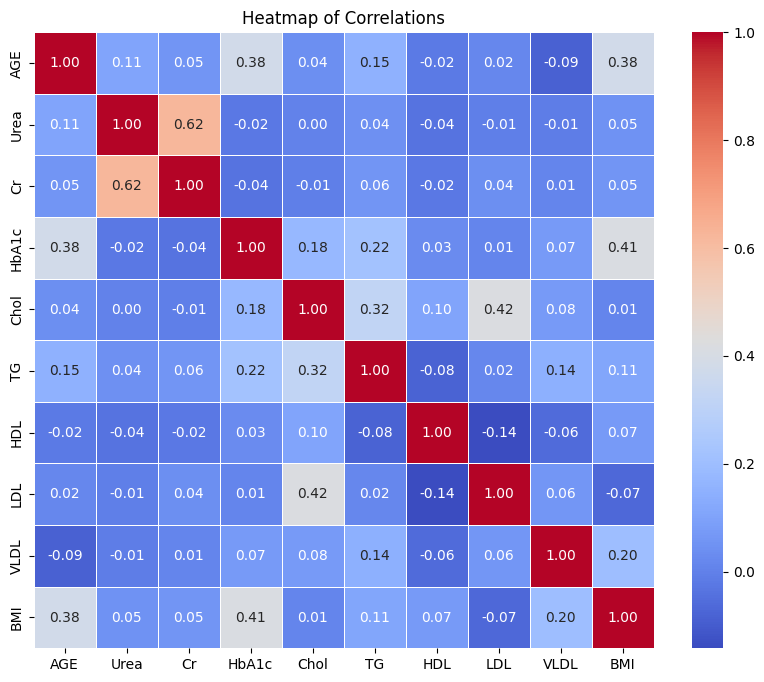

In [11]:
numeric_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df_numeric = df[numeric_columns]
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

In [12]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [13]:
duplicates = df[df.duplicated()]
duplicates

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


In [29]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,34221,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,420,47975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,680,87656,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,504,34223,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [30]:
# Step 1: Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [31]:
df = df.dropna()  # Simple method; more complex imputation can be applied



In [32]:
# 3.2: Encode categorical data (if 'Gender' or other features are categorical)
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})  # Convert Gender to numeric
df['CLASS'] = df['CLASS'].map({'N': 0, 'Y': 1}) # Convert CLASS to numeric

In [33]:
# 3.3: Define features and target (Separate independent variables from the dependent variable)
X = df.drop(columns=['ID', 'No_Pation', 'CLASS'])  # Features (Exclude non-relevant columns)
y = df['CLASS']  # Target variable

In [34]:
# 3.4: Normalize/Standardize the features (This is useful for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\roner\Documents\GitHub\MLClassRedi\.venv\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [36]:
X_scaled

array([[        nan, -0.49706369, -0.15394909, ..., -1.075499  ,
        -0.36978287, -1.20946058],
       [        nan, -3.34766968, -0.22104111, ..., -0.45604603,
        -0.34285888, -1.41527242],
       [        nan, -0.49706369, -0.15394909, ..., -1.075499  ,
        -0.36978287, -1.20946058],
       ...,
       [        nan, -3.11011918, -0.5565012 , ..., -0.01357963,
        -0.2890109 ,  1.46609329],
       [        nan,  1.75966605,  1.72462742, ...,  0.34039349,
        -0.31593489,  1.46609329],
       [        nan,  1.99721655,  1.95944948, ..., -0.72152587,
        -0.34285888,  0.02541043]])

In [37]:
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# Step 5: Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Step 6: Make predictions
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [15]:
%pip install requests beautifulsoup4 lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------------------------------------- - 3.7/3.8 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 16.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Successfully fetched the webpage


In [18]:
soup = BeautifulSoup(response.content, "lxml")

In [ ]:
tables = soup.find_all('table')
tables

In [21]:
dfs = []
for table in tables:
    dfs.append(pd.read_html(str(table))[0])

print(dfs)

[                                                   0
0  Largest economies in the world by GDP (nominal...,                                                    0  \
0  > $20 trillion $10–20 trillion $5–10 trillion ...   

                                                   1  \
0  $750 billion – $1 trillion $500–750 billion $2...   

                                                   2  
0  $50–100 billion $25–50 billion $5–25 billion <...  ,     Country/Territory IMF[1][13]            World Bank[14]             \
    Country/Territory   Forecast       Year       Estimate       Year   
0               World  110064915       2024      105435540       2023   
1       United States   29167779       2024       27360935       2023   
2               China   18273357  [n 1]2024       17794782  [n 3]2023   
3             Germany    4710032       2024        4456081       2023   
4               Japan    4070094       2024        4212945       2023   
..                ...        ...        ... 

C:\Users\roner\AppData\Local\Temp\ipykernel_37352\1503583749.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs.append(pd.read_html(str(table))[0])
C:\Users\roner\AppData\Local\Temp\ipykernel_37352\1503583749.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs.append(pd.read_html(str(table))[0])
C:\Users\roner\AppData\Local\Temp\ipykernel_37352\1503583749.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs.append(pd.read_html(str(table))[0])
C:\Users\roner\AppData\Local\Temp\ipykernel_37352\1503583749.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future ve

In [27]:
print(dfs[2])

    Country/Territory IMF[1][13]            World Bank[14]             \
    Country/Territory   Forecast       Year       Estimate       Year   
0               World  110064915       2024      105435540       2023   
1       United States   29167779       2024       27360935       2023   
2               China   18273357  [n 1]2024       17794782  [n 3]2023   
3             Germany    4710032       2024        4456081       2023   
4               Japan    4070094       2024        4212945       2023   
..                ...        ...        ...            ...        ...   
205          Kiribati        311       2024            279       2023   
206             Palau        308       2024            263       2023   
207  Marshall Islands        305       2024            284       2023   
208             Nauru        161       2024            154       2023   
209            Tuvalu         66       2024             62       2023   

    United Nations[15]             
              